# Deep Learning - Kim Ngan Tran Thi 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

In [2]:

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = 0.05
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=plt.cm.Spectral)
    
def load_planar_dataset(m, sigma=0.2):
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*sigma # theta
        r = a*np.sin(4*t) + np.random.randn(N)*sigma # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    ## premuting ouput
    p = np.random.permutation(m)
    X = X[p,:]
    Y = Y[p,:]

    return X, Y.ravel()

def draw_neural_net(left, right, bottom, top, layer_sizes):
    '''
    From https://gist.github.com/craffel/2d727968c3aaebd10359#file-draw_neural_net-py
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    fig = plt.figure(figsize=(3, 3))
    ax = fig.gca()
    ax.axis('off')

    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

# Dataset 1

In [3]:
N = 5000
X, y = load_planar_dataset(N, 0.2)

#### Visualización

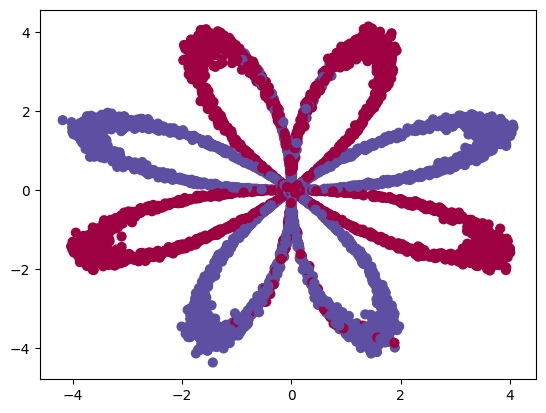

In [4]:
plt.scatter(X[:,0], X[:,1], c=y.ravel(), s=40, cmap=plt.cm.Spectral);

#### Train - Test

In [5]:
# train test split
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(
    X,
    y,
    test_size=0.2,
)

#### Modelo

In [19]:
model = keras.Sequential()
model.add(layers.Dense(32, input_shape=(2,), activation='tanh'))
model.add(layers.Dense(20, input_shape=(2,), activation='tanh'))
# output layer
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
## compiling and training
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=25, validation_split=0.2, batch_size=32)

Epoch 1/25
100/100 [==============================] - 1s 2ms/step - loss: 0.6214 - accuracy: 0.5734 - val_loss: 0.5735 - val_accuracy: 0.6325
Epoch 2/25
100/100 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.7372 - val_loss: 0.4840 - val_accuracy: 0.8325
Epoch 3/25
100/100 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8512 - val_loss: 0.3970 - val_accuracy: 0.8612
Epoch 4/25
100/100 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.8741 - val_loss: 0.3482 - val_accuracy: 0.9013
Epoch 5/25
100/100 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8959 - val_loss: 0.3193 - val_accuracy: 0.9100
Epoch 6/25
100/100 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.9081 - val_loss: 0.3049 - val_accuracy: 0.8975
Epoch 7/25
100/100 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.9100 - val_loss: 0.2942 - val_accuracy: 0.9013
Epoch 

#### Resultado del modelo

Test Loss: 0.23082232475280762
Test Accuracy: 0.9129999876022339
1295/1295 [==============================] - 1s 704us/step


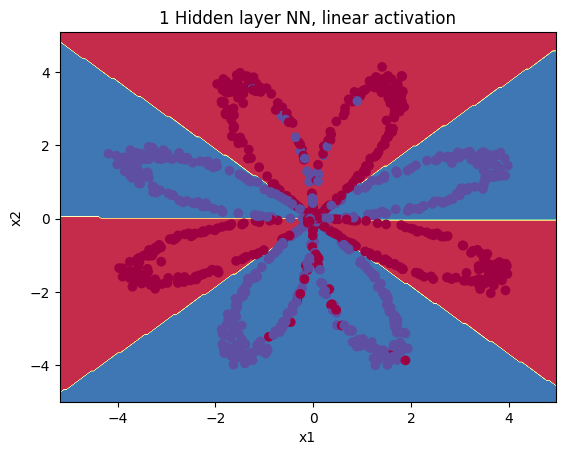

In [21]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))
plot_decision_boundary(lambda x: (
    model.predict(x) > 0.5).astype("int32"), X_test, y_test)
plt.title("1 Hidden layer NN, linear activation");

# Dataset 2

In [22]:
N = 5000
X, y = sklearn.datasets.make_moons(n_samples=N, noise=.18)

#### Visualización

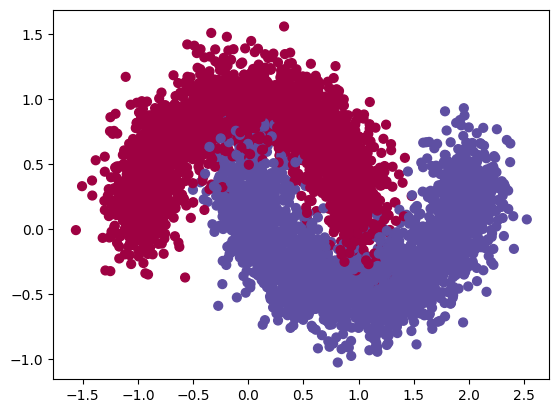

In [23]:
plt.scatter(X[:,0], X[:,1], c=y.ravel(), s=40, cmap=plt.cm.Spectral);

#### Train - Test

In [24]:
# train test split
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(
    X,
    y,
    test_size=0.25,
)
print('X shape:{0}, y shape:{1}'.format(X.shape, y.shape))
print('X_train shape:{0}, y_train shape:{1}'.format(X_train.shape,
                                                    y_train.shape))
print('X_test shape:{0}, y_test shape:{1}'.format(X_test.shape, y_test.shape))

X shape:(5000, 2), y shape:(5000,)
X_train shape:(3750, 2), y_train shape:(3750,)
X_test shape:(1250, 2), y_test shape:(1250,)


#### Modelo

In [25]:
model = keras.Sequential()
## The first layer need to have the input_shape
model.add(layers.Dense(64, input_shape=(2,), activation='relu'))

## Second Layer, don't use input_shape
model.add(layers.Dense(64, activation ="tanh"))

# output layer
model.add(layers.Dense(1, activation="sigmoid"))

In [26]:
## compiling and training
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=35, validation_split=0.2, batch_size=64)

Epoch 1/35
47/47 [==============================] - 1s 5ms/step - loss: 0.4209 - accuracy: 0.8390 - val_loss: 0.3286 - val_accuracy: 0.8427
Epoch 2/35
47/47 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8700 - val_loss: 0.2830 - val_accuracy: 0.8693
Epoch 3/35
47/47 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8827 - val_loss: 0.2576 - val_accuracy: 0.8840
Epoch 4/35
47/47 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.8997 - val_loss: 0.2361 - val_accuracy: 0.8893
Epoch 5/35
47/47 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9117 - val_loss: 0.2080 - val_accuracy: 0.9120
Epoch 6/35
47/47 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9223 - val_loss: 0.1843 - val_accuracy: 0.9267
Epoch 7/35
47/47 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9393 - val_loss: 0.1491 - val_accuracy: 0.9440
Epoch 8/35
47/47 [==

Test Loss: 0.07353253662586212
Test Accuracy: 0.9735999703407288
318/318 [==============================] - 0s 700us/step


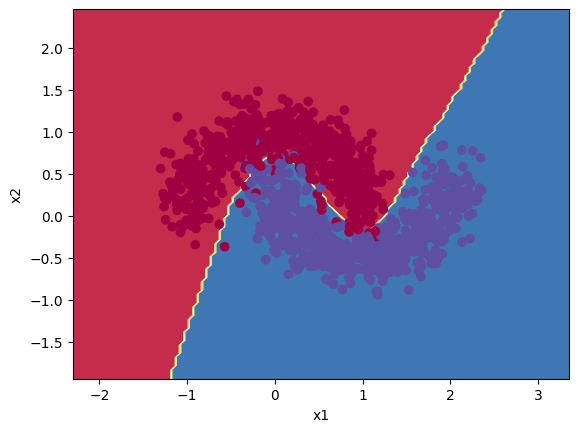

In [27]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))
plot_decision_boundary(lambda x: (
    model.predict(x) > 0.5).astype("int32"), X_test, y_test)

# Dataset 3

In [28]:
N = 5000
X, y = sklearn.datasets.make_circles(n_samples=N, factor=.65, noise=.065)

#### Visualización

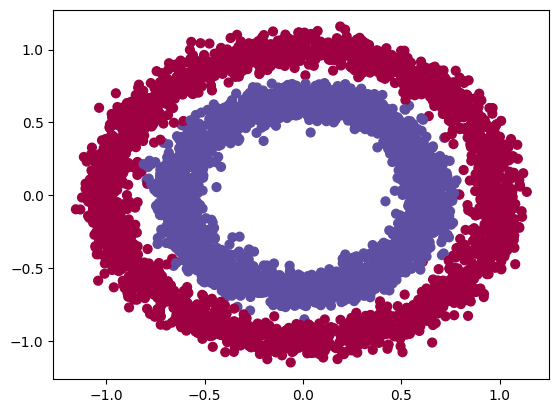

In [29]:
plt.scatter(X[:,0], X[:,1], c=y.ravel(), s=40, cmap=plt.cm.Spectral);

#### Train - Test 

In [30]:
# train test split
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(
    X,
    y,
    test_size=0.25,
)
print('X shape:{0}, y shape:{1}'.format(X.shape, y.shape))
print('X_train shape:{0}, y_train shape:{1}'.format(X_train.shape,
                                                    y_train.shape))
print('X_test shape:{0}, y_test shape:{1}'.format(X_test.shape, y_test.shape))

X shape:(5000, 2), y shape:(5000,)
X_train shape:(3750, 2), y_train shape:(3750,)
X_test shape:(1250, 2), y_test shape:(1250,)


#### Modelo

In [31]:
inputs = keras.Input(shape=(2, ), name='input_layer')
## First hidden layer
l_1 = layers.Dense(8, activation='relu', name='layer_1')(inputs)
l_2 = layers.Dense(8, activation='relu', name='layer_2')(l_1)

## output layer
outputs = layers.Dense(1, activation='sigmoid', name='output_layer')(l_2)
                       

model = keras.Model(inputs=inputs, outputs=outputs, name='modelo1')

In [32]:
## compiling and training
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=35, validation_split=0.2, batch_size=64)

Epoch 1/35
47/47 [==============================] - 1s 5ms/step - loss: 0.7082 - accuracy: 0.4937 - val_loss: 0.6980 - val_accuracy: 0.5093
Epoch 2/35
47/47 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5020 - val_loss: 0.6891 - val_accuracy: 0.5067
Epoch 3/35
47/47 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5057 - val_loss: 0.6815 - val_accuracy: 0.5160
Epoch 4/35
47/47 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5350 - val_loss: 0.6728 - val_accuracy: 0.5600
Epoch 5/35
47/47 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5630 - val_loss: 0.6615 - val_accuracy: 0.5907
Epoch 6/35
47/47 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.5943 - val_loss: 0.6487 - val_accuracy: 0.6893
Epoch 7/35
47/47 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7117 - val_loss: 0.6331 - val_accuracy: 0.7787
Epoch 8/35
47/47 [==

Test Loss: 0.05402666702866554
Test Accuracy: 0.9959999918937683
229/229 [==============================] - 0s 887us/step


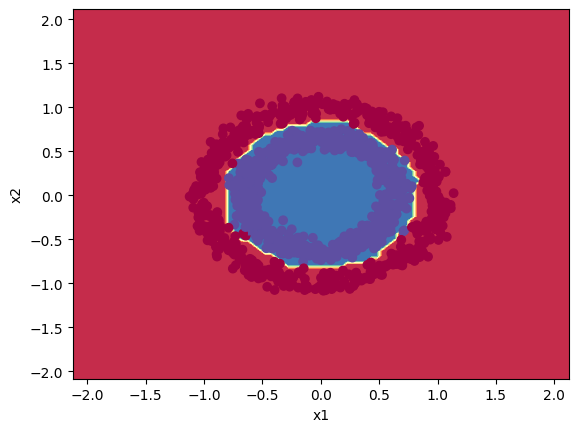

In [33]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))
plot_decision_boundary(lambda x: (
    model.predict(x) > 0.5).astype("int32"), X_test, y_test)

# Visualización del entrenamiento

In [34]:
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
import os

In [35]:
def plot_save_decision_boundary(model, X, y, epoch, epoch_image):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, colors=['blue', 'red'], levels=[-0.5, 0.5, 1.5])
    plt.scatter(X[y[:, 0] == 0][:, 0], X[y[:, 0] == 0][:, 1], color='blue', label='Class 0', alpha=0.5)
    plt.scatter(X[y[:, 0] == 1][:, 0], X[y[:, 0] == 1][:, 1], color='red', label='Class 1', alpha=0.5)
    plt.title(f'Epoch {epoch}')
    plt.savefig(epoch_image)
    plt.close()

def generate_spiral_dataset(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    
    X, y = (np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))), 
            np.hstack((np.zeros(n_points), np.ones(n_points))))
    return X, y.reshape(-1, 1)

n_points = 2500
X, y = generate_spiral_dataset(n_points)

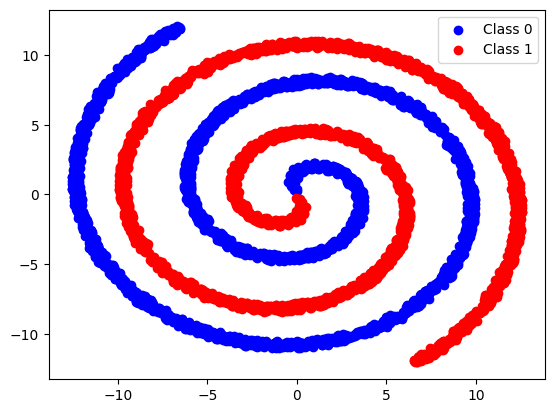

In [36]:
plt.scatter(X[y[:, 0] == 0][:, 0], X[y[:, 0] == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y[:, 0] == 1][:, 0], X[y[:, 0] == 1][:, 1], color='red', label='Class 1')
plt.legend()
plt.show()

In [37]:
# Normalize data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

n_epochs = 60
epoch_images = []

for epoch in range(n_epochs):
    model.fit(X_train, y_train, epochs=1, verbose=0)
    epoch_image = f'epoch_{epoch}.png'
    epoch_images.append(epoch_image)
    
    plot_save_decision_boundary(model, X_test, y_test, epoch, epoch_image)

104/104 [==============================] - 0s 778us/step


In [39]:
from PIL import Image as Image_PIL

# Create the GIF
gif_filename = 'epoch_animation.gif'
images = [Image_PIL.open(epoch_image) for epoch_image in epoch_images]

duration = 0.15
images[0].save(gif_filename,
            format='GIF',
            append_images=images[1:],
            save_all=True,
            duration=duration*1000,
            loop=0)

# Delete the individual epoch images
for epoch_image in epoch_images:
    os.remove(epoch_image)

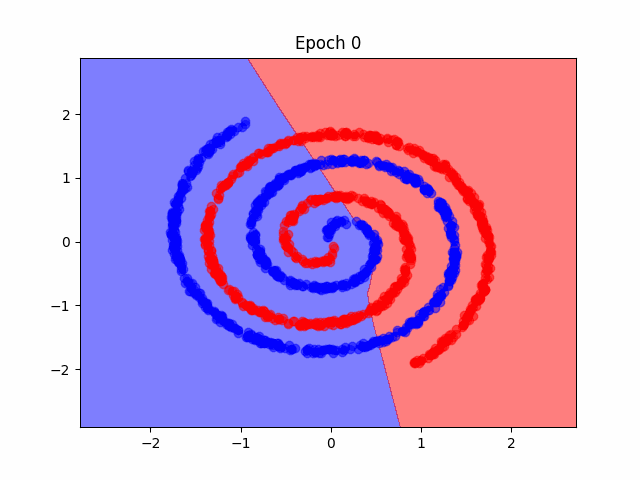

In [40]:
Image(filename=gif_filename)